In [22]:
import os

# def tranverse_folder(oswalker):
   
thermal_dir = "thermal_images"
for root, dirs, files in os.walk(thermal_dir):
    for f in files:
        if(f[-3:] != "csv"): 
            os.remove(os.path.join(root, f))

In [2]:
import pandas as pd 
import numpy as np
from pandas import DataFrame

timestamp = pd.read_csv("project_data/thermal_timestamps.csv")

timestamp.drop(timestamp.columns[-2:], axis=1, inplace=True)
timestamp.drop(timestamp.index[[0,3]], axis=0, inplace=True)

start_mins = [1, 5, 9]
end_mins = [3, 7, 11]
start_sec = [2, 6, 10]
end_sec = [4, 8, 12]

sec_timestamp = DataFrame(columns=["s1", "e1", "s2", "e2", "s3", "e3"])
for i in timestamp.index.values:
    values = timestamp.loc[i].values.astype(int)
    s1, s2, s3 = values[start_mins]*60 + values[start_sec]
    e1, e2, e3 = values[end_mins]*60 + values[end_sec]
    sec_timestamp.loc[values[0]] = [s1, e1, s2, e2, s3, e3]
sec_timestamp.to_csv("project_data/thermal_timestamps.csv")

IndexError: index 5 is out of bounds for axis 1 with size 5

In [3]:
timestamps = pd.read_csv("project_data/thermal_timestamps.csv", index_col=0)
labels = pd.read_csv("project_data/labels.csv", usecols=[0,1], dtype={"id": int, "label": str}, index_col=0)
# labels
def get_story_by_frame(subject, frame):
    second= frame/10.0 if (subject<15) else frame
    sub_data = timestamps.loc[subject].values
    i, j = 0, 1
    story = -1
    for k in range(3):
        if (sub_data[i] <= second <= sub_data[j]):
            story = k+1
            break
        i += 2
        j += 2
    return story
    
    
def get_label_by_frame(subject, frame):
    story = get_story_by_frame(subject, frame)
    if (story == -1): return None
    return labels.loc[subject].values[0][story-1]
    

print get_label_by_frame(1,410)
timestamps

0


,s1,e1,s2,e2,s3,e3
1,9,33,41,59,78,83
2,140,157,157,184,184,237
4,62,77,100,107,146,154
5,156,195,199,246,254,294
6,75,97,102,126,150,167
7,174,227,243,294,313,363
8,80,123,130,170,170,217
9,109,131,131,145,145,157
10,216,223,230,249,325,335
11,159,218,306,357,361,404


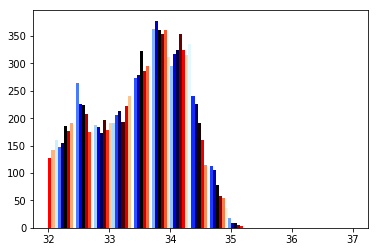

In [13]:
import pandas as pd 
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import os

thermal_folder = "thermal_images/"
timestamp_folder = "project_data/thermal_timestamps.csv"
label_folder = "project_data/labels.csv"

filter_temp = 32

timestamps = pd.read_csv(timestamp_folder, index_col=0)
labels = pd.read_csv(label_folder, usecols=[0,1], dtype={"id": int, "label": str}, index_col=0)

def get_story_by_frame(subject, frame):
    second= frame/10.0 if (subject<15) else frame
    sub_data = timestamps.loc[subject].values
    i, j = 0, 1
    story = -1
    for k in range(3):
        if (sub_data[i] <= second <= sub_data[j]):
            story = k+1
            break
        i += 2
        j += 2
    return story

def get_label_by_frame(subject, frame):
    story = get_story_by_frame(subject, frame)
    if (story == -1): return None
    return labels.loc[subject].values[0][story-1]

def csv_tranverse(path):
    walker = os.walk(path)
    walker.next()
    for root, dirs, files in walker:
        subject = root.split("/")[-2]
        for f in files:
            yield pd.read_csv(os.path.join(root, f)).as_matrix()

def plot_bins(bin_places):
    cm = plt.cm.get_cmap('plasma')
    n, bins, patches = plt.hist(frame_1, bins=bin_places[1], color='green')
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.savefig("temp.png", dpi=1000)
    plt.show()

def extract_frame_features(frame):
    frame_1[frame_1 < filter_temp] = 0 #filter all pixels lower than 30
    frame_1 = frame_1[np.where(frame_1 != 0)].flatten() # new array with only filtered values
    features = np.array([frame_1.min(), frame_1.max(), np.mean(frame_1)]) # get mean, max and min values of pixels
    features = np.append(features, features[1] - features[0]) # add max difference in pixels
    bin_places = np.histogram(frame_1, np.linspace(filter_temp, 37.0, 101))[0] # take the values of the bins
    features = np.concatenate((features, bins_places)) # add primary features to bin features
    return features


csv_generator = csv_tranverse(thermal_folder)
# for frame, label in csv_generator:
    
    

# plot_bins(bin_places)

# print bin_places 